<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/questions_chapter2_Hoepfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
#data = pd.read_csv("/content/drive/MyDrive/Python/ML-Course/2/kc_house_data.csv")
data = pd.read_csv("/content/drive/MyDrive/DigitalOrganizations/Assignment2/kc_house_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Description* of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

<b>Answer:

Data pipelines are used to manipulate and transform large amounts of data through a series of self-contained components -> output goes to a data store for the next component to use.
The system is simple to understand and robust, but it requires monitoring to avoid performance issues due to stale data. 

An example would be that data gets collected and preprocessed. Some of the features could be the result from previous machine learning models calculations (e.g. the condition could be calculated based on various rules). The result of the pricing component can be reused in a decision support system which runs another ML model to help investors decide whether they should buy a property or not. </b> 

<br>

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

<b>Answer:
- Supervised: training examples have labels
- Regression: predicts a number; target variable is continuous
- Batch or online learning: both possible, but batch learning should be sufficient because housing data does not change that quickly and the size of the data set is not too big </b>

<br>

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?

<b>Answer:

- Performance measure: determines the quality of responses of the ML model (so different models can be compared, either cost or utility function)
- Regression models: 
Root mean square error (RMSE) and Mean absolute error (MAE) -> interpretation: cost functions, lower error is preferred (a good ML model should minimie RMSE/MAE), MAE (l1-norm) is better than RMSE (l2-norm) when there are many outliers (because it does not square the distance)
</b> 


##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

<b>Answer:

waterfront vs. yr_renovated: 
In many training instances they are zero. Waterfront is 1 in some instances (so it probably should be interpreted as boolean). yr_renovated on the other hand contains are year when it is not 0. -> Some data cleaning necessary (see below)

Categorical, ordinal or numeric?:

  * id: a notation for a house (string)
  * date: Date house was sold (date, should still be casted)
  * price: Price is prediction target (numeric, continuous)
  * bedrooms: Number of Bedrooms/House (numeric, integer)
  * bathrooms: Number of bathrooms/bedrooms (numeric, integer)
  * sqft_living: square footage of the home (numeric, continuous)
  * sqft_lot: square footage of the lot (numeric, continuous)
  * floors: Total floors (levels) in house (numeric, integer)
  * waterfront: House which has a view to a waterfront (numeric, actually boolean/categorical)
  * view: Has been viewed (numeric, boolean/categorical)
  * condition: How good the condition is Overall (numeric, integer, ordinal)
  * grade: overall grade given to the housing unit, based on King County grading system (numeric, integer, ordinal)
  * sqft_above: square footage of house apart from basement (numeric, continuous)
  * sqft_basement: square footage of the basement (numeric, continuous)
  * yr_built: Built Year (numeric)
  * yr_renovated: Year when house was renovated (numeric)
  * zipcode: zip code (numeric, integer, but should be better casted to string?)
  * lat: Latitude coordinate (numeric, continuous)
  * long: Longitude coordinate (numeric, continuous)
</b>

In [ ]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [ ]:
data.value_counts()

date             price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long    
20140502T000000  235000.0   2         1.00       1210         9400      1.0     0           0     2          6      1210        0              1949      0             98106    47.5342  -122.360    1
20141223T000000  1130000.0  4         3.00       3180         4649      2.0     0           0     4          9      2070        1110           1925      0             98105    47.6583  -122.273    1
20141224T000000  255000.0   3         1.50       1110         10296     1.0     0           0     5          7      1110        0              1964      0             98042    47.4220  -122.153    1
                                      1.00       1580         8206      1.0     0           0     3          7      1100        480            1962      0             98198    47.3676  -122.312    1
          

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

<b>Answer: 
- Yes, for example the price is right-skewed 
- Right-skewed (values extend farther to the right of the median than to the left), left-skewed (the other way around)
- In our case and in general right-skewed can be seen more often (e.g in price, sqft_living, bathrooms, sqft_above) because often there is a limit at the bottom at zero
- yr_built is probably left-skewed (a lot of new houses, which is why the median is closer to the present; a long tail towards the past until 1900)
- Do scales differ?: Of course, because the features refer to very different characteristics (e.g. price (measured in thousands) or number of bathrooms (four is already a lot))
- yr_renovated: Problematic, because a lot of 0-values and few close to the present
</b>

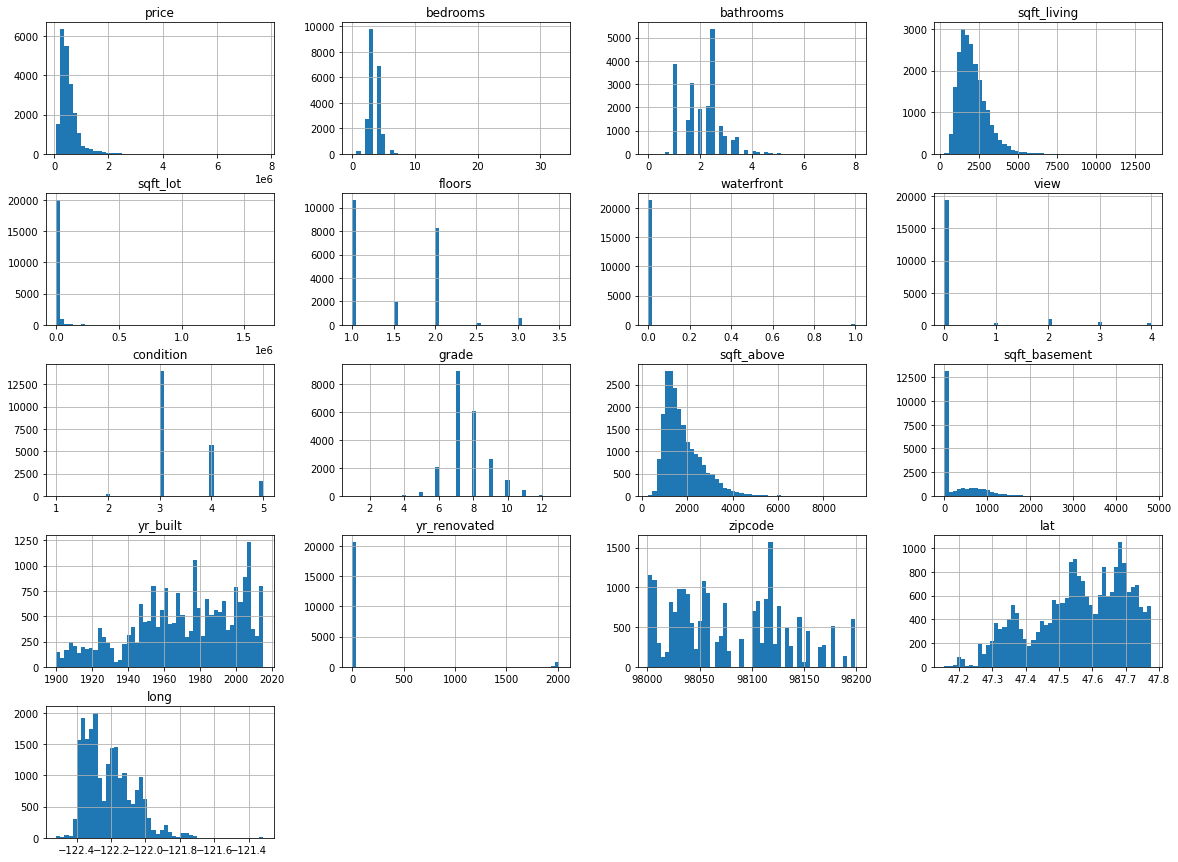

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

<b>Answer:

Either null or just use the building year if no renovation has taken place
</b>

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
data['date'] = pd.to_datetime(data['date'])
data['renovated'] = pd.cut(data['yr_renovated'], bins = [-1, 1, 2023], labels = [0, 1])
data['yr_renovated'] = data[['yr_renovated', 'yr_built']].max(axis = 1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,0


##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

<b>Anwer:
- Danger when doing purely random sampling (or splitting the data into train and test data randomly): sampling bias (sample is not representative of the general population)
- Stratified sampling divides data into homogenous subgroups (e.g. by income) to avoid this issue
- E.g., here we want to make sure that our test data contains different house prices or income categories in a way that is representative of the general population -> stratified sampling
</b>

In [ ]:
#create extra column for house price category
data['price_cat'] = pd.cut(data['price'], bins = [0., 250000, 500000, 750000, 1000000, np.inf], labels=[1,2,3,4,5])

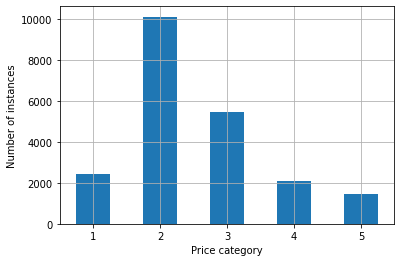

In [ ]:
data["price_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Price category")
plt.ylabel("Number of instances")
plt.show()
#->Categories seem alright

In [ ]:
data['price_cat'].value_counts() / len(data)

2    0.468561
3    0.253181
1    0.112571
4    0.097904
5    0.067783
Name: price_cat, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

#stratified sampling based on the new category
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data['price_cat'])

In [ ]:
#Check if stratified sampling worked
test_set['price_cat'].value_counts() / len(test_set)
#-> corresponds to distribution in the whole data

2    0.468656
3    0.253065
1    0.112653
4    0.097849
5    0.067777
Name: price_cat, dtype: float64

In [ ]:
data = train_set.copy()
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_cat
5954,2014-06-02,725995.0,4,2.50,3190,7869,2.0,0,2,3,9,3190,0,2001,2001,98065,47.5317,-121.866,0,3
2346,2014-11-10,520000.0,3,2.50,2280,58712,2.5,0,3,3,9,2280,0,1987,1987,98010,47.3053,-122.000,0,3
19543,2015-01-05,385000.0,2,1.50,1370,159865,1.0,0,0,3,7,1370,0,1960,1960,98072,47.7592,-122.092,0,2
7136,2015-04-24,222000.0,3,1.00,1460,8400,1.0,0,0,4,6,1460,0,1962,1962,98023,47.3086,-122.365,0,1
8239,2014-05-28,220000.0,3,1.00,1180,5002,1.5,0,0,3,7,1180,0,1946,1946,98155,47.7529,-122.324,0,1
10825,2014-10-23,515700.0,3,2.50,2180,9722,2.0,0,0,3,8,2180,0,1994,1994,98056,47.5270,-122.173,0,3
18527,2014-09-09,220000.0,5,1.00,1260,8382,1.5,0,0,3,7,1260,0,1918,1918,98146,47.5058,-122.355,0,1
15103,2014-12-09,348500.0,4,1.75,1870,7575,1.0,0,0,3,7,1480,390,1972,1972,98034,47.7205,-122.218,0,2
12602,2015-02-17,227490.0,3,1.75,1820,7194,1.0,0,0,4,7,1820,0,1967,1967,98003,47.3352,-122.307,0,1
8318,2014-11-06,375000.0,3,2.00,1410,10078,1.0,0,0,4,6,1410,0,1983,1983,98072,47.7587,-122.144,0,2


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

<b>Answer:

- The most expensive area is in the north-west of the county around the city of Seattle
- A simpler feature would be to just consider the (euclidean) distance from Seattle which can be calculated based on latitude and longitude </b>

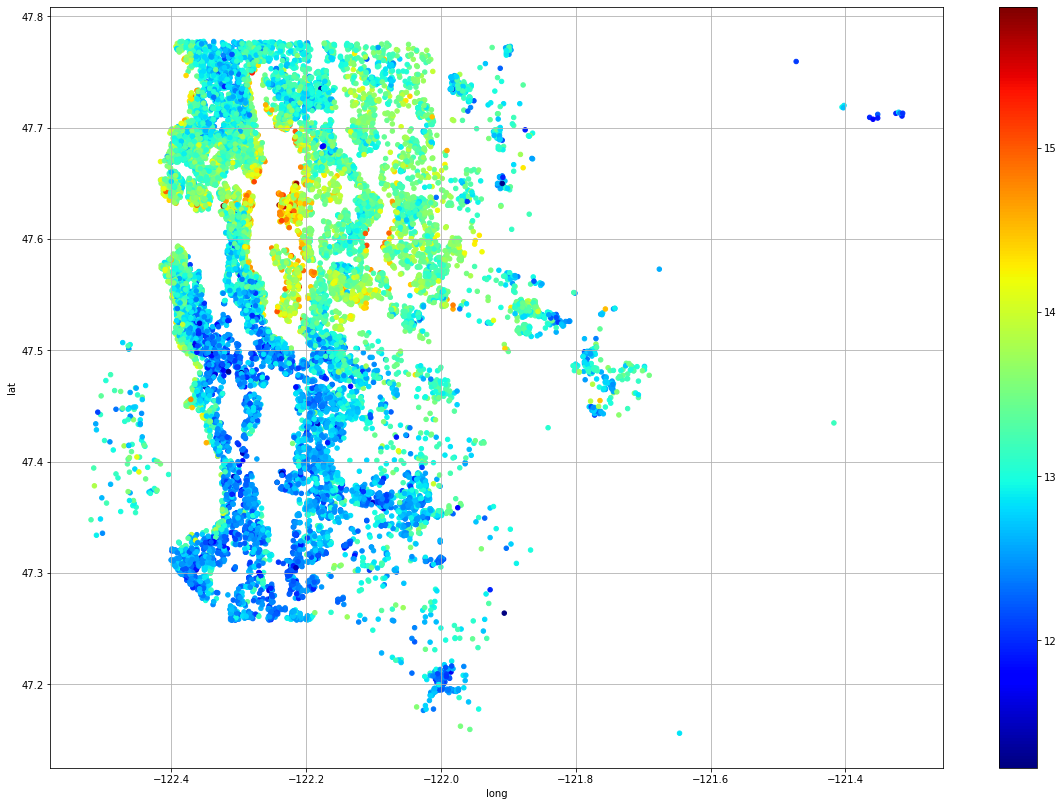

In [ ]:
data.plot(kind='scatter', x ='long', y = 'lat', grid = True, c=np.log(data['price']), cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(20, 14))

plt.show()

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

<b>Answer:

Correlation:
- Standard correlation coefficient ranges from -1 to 1 and indicates the strength and direction of a linear relationship between two variables. 
- Coefficient close to 1: strong positive linear correlation 
- Coefficient close to -1: strong negative linear correlation
- Coefficients close to 0: no linear correlation

Best variables to predict in ML model:
- high (positive or negative) correlation

In our case:
- For sqft size of living area or basement a positive correlation makes sense and can be observed in the data (same for waterfront, floors, bedrooms, view, bathrooms, grade,...)
- Also for the latitude in our example because of the geographic distribution (see map above)
- For zipcode the correlation obviously does not make any sense (because it is just an arbitrary number; it might be useful as a category, but not as a numeric feature)
- condition and yr_built have surprisingly low correlations with the price
</b>

In [ ]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.699504
grade            0.666243
sqft_above       0.604383
bathrooms        0.523176
view             0.392170
sqft_basement    0.315028
lat              0.307027
bedrooms         0.304453
floors           0.255056
waterfront       0.251151
yr_renovated     0.106167
sqft_lot         0.090114
yr_built         0.053306
condition        0.033582
long             0.022418
zipcode         -0.052192
Name: price, dtype: float64

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

<b>Answer:

Observations about sqft_living, sqft_above and sqft_basement:
- sqft_living is capped by sqft_above
- all three have high correlations with each other
- all three have high correlations with the price
- some houses don't have basements, so there are a lot of zero values for sqft_basement (which should be considered)

</b>


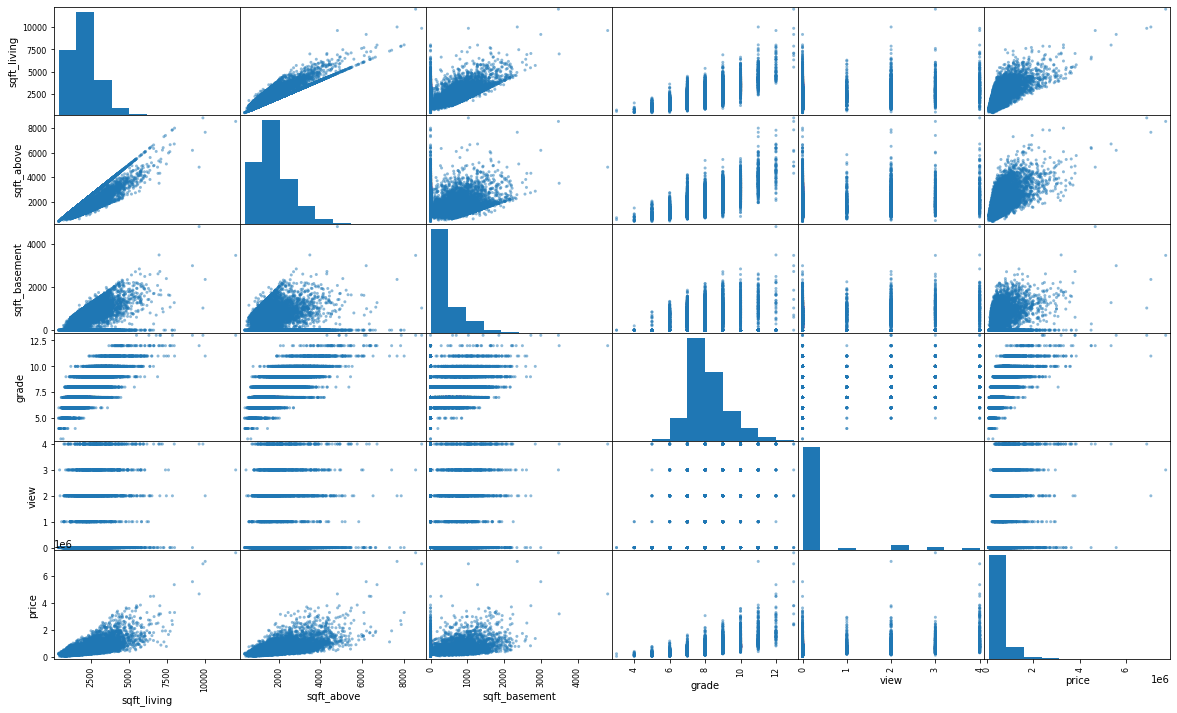

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["sqft_living", "sqft_above", "sqft_basement", "grade", "view", "price"]
scatter_matrix(data[attributes], figsize=(20, 12))
plt.show()

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
data['bedroom_density'] = data['bedrooms']/data['sqft_living']

In [ ]:
#Calculate correlations again
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)
#Observation: bedroom density has a negative correlation with price

price              1.000000
sqft_living        0.699504
grade              0.666243
sqft_above         0.604383
bathrooms          0.523176
view               0.392170
sqft_basement      0.315028
lat                0.307027
bedrooms           0.304453
floors             0.255056
waterfront         0.251151
yr_renovated       0.106167
sqft_lot           0.090114
yr_built           0.053306
condition          0.033582
long               0.022418
zipcode           -0.052192
bedroom_density   -0.463491
Name: price, dtype: float64

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

<b>Answer:

SimpleImputer(strategy="median") replaces all missing attributes with the mean of that attribute
</b>

In [ ]:
#Shows how many missing attributes there are for each attribute
data.isna().sum()
# There are no missing values

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
renovated        0
price_cat        0
dtype: int64

###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

<b>Answer:

- Categorical data: Not nummerical, but different categories
- Ordinal data: Like categorical, but there is an implied order (like from good to bad)

-> If they are textual, we can replace them by numbers by using an Encoder (but in our dataset there is not any text anyways):
- For ordinal data: OrdinalEncoder()
- For categorical data without an implied order: OneHotEncoder(). it creates one binary attribute for each category, is set either 1 or 0. Those new binary attributes are called dummy attributes
</b>

In [ ]:
#Waterfront is already either 1 or 0
test_set['waterfront'].value_counts() / len(test_set)

0    0.992366
1    0.007634
Name: waterfront, dtype: float64

In [ ]:
#I did not really understand what we should do here, because waterfront is already either 1 or 0 (see above)
#It would be different if the feature was textual or if there were more categories (like in the example in the book) 
#So to my understanding, the encoding for this attribute is not necessary in this case

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
waterfront_encoded = cat_encoder.fit_transform(data[['waterfront']])
waterfront_encoded.toarray()
cat_encoder.categories_

[array([0, 1])]

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

<b>Answer:

- min-max scaling: substract the minimum and divide by the difference between the minimum and maximum
- Standardization: first subtract the mean value, then divide the result by the standard deviation -> standardized values: mean = 0, standard deviation = 1

- Heavy tail distribution: there are a lot of values far from the mean

- Problems in heavy-tailed distribution with min-max scaling and with standardization: values will be put in a very small range, especially in min-max scaling this is problematic (because the min or max is determined by the outlier) -> Solution: e.g. first applying logarithm will help

- Example: Most houses cost around 500,000, but there is one house that costs 50 millions (maximimum). In min-max scaling 50 millions will be scaled to 1, but most other values will be scaled to be very close to 0

</b>

In [ ]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'price_cat'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

<b>Answer:
- Guess for variable conversion:
  - "waterfront", "renovated": should be categories
  - different sqft sizes and the price itself: logarithmized, because they have a long tail
  - Other attributes: can be left as they are
- Other answers & understanding of code: see comments in code

</b>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

#Custom transformer, inherits from base classes BaseEstimater and TransformerMixin
class ClusterSimilarity(BaseEstimator, TransformerMixin):

    #Constructor: number of cluster, gamma for rbf_kernel, random seed
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    #fit method:
    def fit(self, X, y=None, sample_weight=None):
        #Construct KMeans-transformer instance and fit it on the data X 
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    #transform new data
    def transform(self, X):
        #cluster_centers_ contains the coordinates of the centroids determined by kmeans
        #rbf_kernel is used to calculate the distance from each data point to the centroids
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    #Names of the new dummy features (distance to each of the centroids), useful when transforming np-array to df
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters) ]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


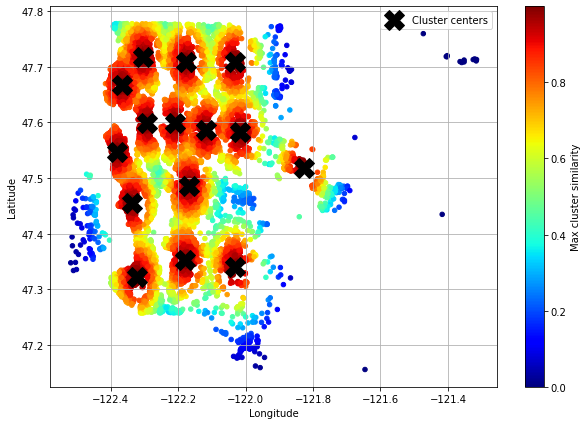

In [ ]:
#instance of class defined above
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

#fit and transform defined above are executed sequentially
#Lat and long are transformed to the distance to the various centroids -> so for each cluster a new feature is introduced
#The price is used as a weight in kmeans
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

#The closest distance to a centroid is determined
data_renamed["Max cluster similarity"] = similarities.max(axis=1)

#Scatter plot of the geographic location of the houses as a heat map (the closer the closest centroid, the more red)
data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))

#Scatter plot of the centroids
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

<b>Answers & understanding of code: see comments in code
</b>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#Absolute date is transformed to the distance from today
def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

#dates are first transformed with the time function and then scaled
date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

#Transformer for coordinates (see cells above)
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

#numbers are only scaled
default_num_pipeline = make_pipeline(StandardScaler())

#some numbers are first logarithmized and then scaled
log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

#the label is only logarithmized, but not scaled
label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

#Categories are stored in binary features for each category (OneHotEncoder: see explanation above)
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

#different features are fed to different preprocessing transformers
preprocessing = ColumnTransformer([
 #logarithmized, because they have a long tail
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 #coordinates are transformed to the distance to each of the 15 clusters
 ("geo", cluster_simil, ["lat", "long"]),
 #waterfront is the only category (already either 1 or 0, so not sure if this is necessary: see my comment above)
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 #date transformed to distance from today
 ("date", date_pipeline, ["date"]),
 #other features are only scaled
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

#Label is only logarithmized
preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

<b>Answer:

31 (more now, because there were introduced new features for the distance to the centroids above)
</b>

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape
df_new = pd.DataFrame(data_prepared)
df_new.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.218256,-0.022779,1.573099,7.701418e-01,1.800392e-08,1.241463e-11,2.952146e-06,1.421547e-06,2.569202e-12,3.086284e-03,...,0.0,1.320281,1.021914,0.958074,0.666304,0.504693,0.933705,2.303817,-0.628748,1.150787
1,0.425652,2.205817,0.786680,3.681081e-04,1.232849e-07,2.946800e-05,2.803127e-09,2.856056e-02,2.816082e-12,5.311025e-01,...,0.0,-0.107778,0.545654,0.472606,-0.399412,0.504693,1.858477,3.608448,-0.628748,1.150787
2,-0.776461,3.316598,-0.406053,1.550207e-06,1.133977e-03,3.149458e-11,4.252965e-01,1.964769e-08,2.916293e-04,2.284513e-07,...,0.0,-0.604494,-0.372847,-0.463654,-1.465129,-0.797764,-0.915841,-0.305445,-0.628748,-0.556900
3,-0.626302,0.049634,-0.257067,1.064943e-15,2.629110e-04,8.125183e-01,1.794096e-09,3.193579e-02,1.946693e-06,2.395160e-05,...,0.0,-1.571316,-0.304809,-0.394301,-0.399412,-1.448993,-0.915841,-0.305445,0.909101,-1.410743
4,-1.128803,-0.525219,-0.755647,2.715417e-14,5.012674e-02,1.095405e-08,8.718634e-02,1.061865e-08,4.393480e-01,1.912836e-10,...,0.0,1.364630,-0.849106,-0.949122,-0.399412,-1.448993,0.008932,-0.305445,-0.628748,-0.556900


##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [ ]:
from sklearn.linear_model import LinearRegression

#label is also preprocessed
data_label_transformed = preprocessing_label.fit_transform(data_label)

#instances of LinearRegression predictor including preprocessing
lin_reg = make_pipeline(preprocessing, LinearRegression())
#fit model on training data
lin_reg.fit(data, data_label_transformed)
#make preditions (still on training data) 
data_predictions = lin_reg.predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [ ]:
#Invert logarithmization
label_inverse_pipeline = label_pipeline = make_pipeline(FunctionTransformer(np.exp))
data_predictions_inverse = label_inverse_pipeline.fit_transform(data_predictions)

In [ ]:
#first 5 predictions
data_predictions_inverse[:5]

array([[693755.77178587],
       [547945.14874053],
       [432318.07905566],
       [235418.27366575],
       [298671.02416926]])

In [ ]:
#Median of prediction
np.median(data_predictions_inverse)

457415.81164322654

In [ ]:
#Compare to actual labels
data_label.iloc[:5].values

array([[725995.],
       [520000.],
       [385000.],
       [222000.],
       [220000.]])

In [ ]:
#Median of actual labels
np.median(data_label)

450000.0

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(data_label.to_numpy(), data_predictions_inverse, squared=False)
lin_rmse
#high error -> not a good model

147078.43701641072

In [ ]:
#Median of absolute error
np.median(np.absolute(data_predictions_inverse-(data_label.to_numpy())))
#Error more acceptable
#Median of absolute error only about 50k, there seem to be a lot of outliers which explains that RMSE is much higher

50412.50982538765

###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

<b>Answer:

- Cross validation (quote from book): randomly splits the training set into 10 nonoverlapping subsets called folds, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training.

- neg_exp_root_mean_squared_error adjusted in order to invert logarithmization

- np.ravel: flattens the array (was 2D before)

</b>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

#preprocess labels again
data_label_transformed = preprocessing_label.fit_transform(data_label)
data_label_transformed
#Instantiate transformer and fit data
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

#Custom scorer
def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

#Perform cross validation
forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(forest_rmses).describe()
#mean deviation of -128231 is better than 147078 we had at linear regression; negative sign because price is mostly underestimated

count        10.000000
mean    -128231.610148
std       12425.255282
min     -143733.695361
25%     -135613.174761
50%     -130192.600640
75%     -120077.074338
max     -107062.172048
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

<b>Answer:
- Grid search: try out various hyperparameter combinations (possible values from a list) -> Advantage: a lot of combinations can be chosen manually and tried out
-  Random search: the hyperparameters are chosen randomly -> Advantage: more efficient
- In our case the number of clusters or the parameter gamma would be hyperparameters that could be adapted by grid or random search
</b>

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

#Here the linear regression is chosen as the final model, because it was the focus of this notebook (but of course there are arguments to use the RandomForestRegressor)
final_prediction = lin_reg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [ ]:
#predictions seem fine compared to real data
np.ravel(np.exp(final_prediction))[:5]

array([895603.74308064, 304767.35460881, 429811.97482453, 292026.32411038,
       436267.73730113])

In [ ]:
np.ravel(y_test.to_numpy())[:5]

array([862000., 320000., 465000., 334000., 401000.])

In [ ]:
#Median of absolute deviation
np.median(np.ravel(np.absolute(np.ravel(np.exp(final_prediction))-(np.ravel(y_test.to_numpy())))))

48649.91541787464

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(np.ravel(y_test.to_numpy()), np.ravel(np.exp(final_prediction)), squared=False)
lin_rmse
#RMSE again much higher

143943.59993976334

In [ ]:
#confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (np.ravel(np.absolute(np.ravel(np.exp(final_prediction))-(np.ravel(y_test.to_numpy()))))) ** 2
np.sqrt(squared_errors)
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([130936.88866937, 155868.6983099 ])

##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

<b>Answer:
- joblib-libary
- Why is it necessary?: for example to deploy it on a server for a website or in the cloud
</b>

In [ ]:
import joblib
joblib.dump(lin_reg, "housing_king_county_lin_reg.pkl")

['housing_kin_county_lin_reg.pkl']

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 